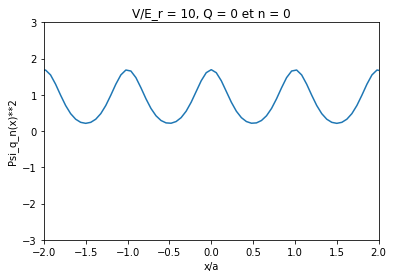

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

p = 20 # taille de la matrice = 2n+1
t = 500 #precision des graphiques

path = os.getcwd() #chemin d'accès du script _ inutile dans cette version


############
# Construction de la matrice tridiagonale
############

def function(j,Q,V):
    return (2*j+Q)**2+V/2

def createVector(j,Q,V,p): #cree un vecteur de taille 2p+1
    Vector = np.zeros(2*p+1)
    Vector[j] = function(j-p,Q,V) # il faut tenir compte du fait que j evolue sur
                                  # Z mais que les indices vecteur commencent à 0
    if j == 0: # correspond au cas j = -n renormalise
        Vector[j+1] = -V/4
    elif j == 2*p: # correspond au cas j = +n renormalise
        Vector[j-1] = -V/4
    else:
        Vector[j+1] = -V/4
        Vector[j-1] = -V/4
    return Vector

def createMatrix(Q,V,p):
    Matrix = np.zeros(shape=(2*p+1,2*p+1))
    for j in range(0,2*p+1):
        #print(j, Q, V, p)
        Matrix[j] = createVector(j,Q,V,p)
    return Matrix

############
# Calcul des Bandes d'energie
############


def Energy(Q,V,N):  # N : niveau d'energie
    M = createMatrix(Q, V, p)
    return np.linalg.eigh(M)[0][N]

def createFunctionEnergy(ListQ:list,V,n): # cree un vecteur de la bande n en 
                                # fonction de la variable Q
    E_n = np.zeros(len(ListQ))
    for q in range(len(ListQ)):
        E_n[q] = Energy(ListQ[q],V,n)
    return E_n

def createAllBandsEnergy(ListQ:list, V, N):
    E = []
    for n in range(N):
        E_n = createFunctionEnergy(ListQ, V, n)
        E += [E_n]
    return E

def plotEnergyBands(V, N): # trace les energies de 0 à N
    ListQ = np.array(range(-t,t+1))/(t)
    E = createAllBandsEnergy(ListQ, V, N)
    figure = plt.figure()
    for i in range(N):
        plt.plot(ListQ,E[i])
        plt.ylim(-1,N**2)
        plt.xlabel('q/k')
        plt.ylabel('E(q)/E_r')
        plt.title('Spectre pour V = '+ str(V))
    plt.savefig('V='+str(V) +'_n='+str(N)+'.eps')
    plt.show()


#plotEnergyBands(V, 6)

############
# Calcul des coefficients
############

def coefficientsCi(Q,V,N):
    M = createMatrix(Q, V, p)
    return np.transpose(np.linalg.eigh(M)[1])[N]

def plotCoefficientsCi(Q,V,N):
    coefficients = coefficientsCi(Q,V,N)
    figure = plt.figure()
    plt.plot(coefficients)

############
# Construction de Psi
############

def functionPsi(x,Q,V,N): # cree la fonction Psi_q_n de la bande n en 
                                # fonction de la variable Q
    Psi_q_n = 0
    coefficients = coefficientsCi(Q,V,N)
    for i in range(len(coefficients)):
        ci = coefficients[i]
        Psi_q_n += ci*np.exp(1j*(2*(i-p)+Q)*x*np.pi)
    return Psi_q_n.real   # par symetrie c'est sense etre un reel dans tous les cas

def plotPsi(Q,N):
    ListX = np.array(range(-t,t+1))/(t/30)
    Y = functionPsi(ListX,Q,V,N)
    figure = plt.figure()
    plt.ylim(-3,3)
    plt.xlim(-2, 2)
    plt.plot(ListX,Y)
    plt.xlabel('x/a')
    plt.ylabel('Psi_q_n(x)**2')
    plt.title('V/E_r = '+str(V)+', Q = '+str(Q)+' et n = '+str(N))
    plt.savefig('u_V='+str(V)+'_Q='+str(int(100*Q))+'_N='+str(N)+'.pdf',dpi=150)
    plt.show()


############
# Exemple de programme
############
    
V = 10
Q = 0
N = 0
plotPsi(Q,N)


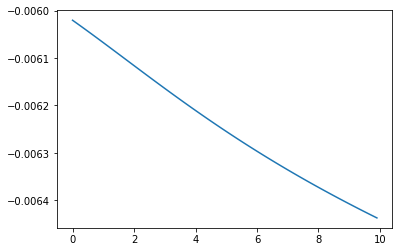

In [29]:
V = np.array(range(100))/10
Q = 0
N = 0
listRatio = []
x = np.array(range(-t,t+1))/(t/30)
for v in V:
    c0 = np.sum(functionPsi(x,Q,v,N)/1)
    c2 = np.sum(functionPsi(x,Q,v,N)*np.cos(2*x))
    listRatio += [c2/c0]
    
plt.figure()
plt.plot(V, listRatio)
plt.show()

In [27]:
x/(2*np.pi)

array([-4.77464829, -4.765099  , -4.7555497 , ...,  4.7555497 ,
        4.765099  ,  4.77464829])